# Creating Fair Voting Districts Clustering

## Import Statements

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
import geopandas as gpd
import pandas as pd
import fiona 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry

## Open Shapefile with Fiona and GeoPandas

In [2]:
 fiona.open('CO_census_block_2017.shp')

<open Collection 'CO_census_block_2017.shp:CO_census_block_2017', mode 'r' at 0x2a014876040>

In [30]:
colorado_init = gpd.read_file('CO_census_block_2017.shp')

##Choose only census blocks in Denver County
colorado = colorado_init.loc[colorado_init['geonum'].isin(['1080319801001',
'1080319800001',
'1080310157004',
'1080310157003',
'1080310157002',
'1080310157001',
'1080310156004',
'1080310156003',
'1080310156002',
'1080310156001',
'1080310155003',
'1080310155002',
'1080310155001',
'1080310154004',
'1080310154003',
'1080310154002',
'1080310154001',
'1080310153003',
'1080310153002',
'1080310153001',
'1080310120144',
'1080310120143',
'1080310120142',
'1080310120141',
'1080310120103',
'1080310120102',
'1080310120101',
'1080310120012',
'1080310120011',
'1080310119032',
'1080310119031',
'1080310119024',
'1080310119023',
'1080310119022',
'1080310119021',
'1080310083912',
'1080310083911',
'1080310083903',
'1080310083902',
'1080310083901',
'1080310083893',
'1080310083892',
'1080310083891',
'1080310083882',
'1080310083881',
'1080310083872',
'1080310083871',
'1080310083862',
'1080310083861',
'1080310083123',
'1080310083122',
'1080310083121',
'1080310083064',
'1080310083063',
'1080310083062',
'1080310083061',
'1080310083053',
'1080310083052',
'1080310083051',
'1080310083043',
'1080310083042',
'1080310083041',
'1080310070894',
'1080310070893',
'1080310070892',
'1080310070891',
'1080310070884',
'1080310070883',
'1080310070882',
'1080310070881',
'1080310070373',
'1080310070372',
'1080310070371',
'1080310070132',
'1080310070131',
'1080310070062',
'1080310070061',
'1080310069015',
'1080310069014',
'1080310069013',
'1080310069012',
'1080310069011',
'1080310068144',
'1080310068143',
'1080310068142',
'1080310068141',
'1080310068133',
'1080310068132',
'1080310068131',
'1080310068123',
'1080310068122',
'1080310068121',
'1080310068114',
'1080310068113',
'1080310068112',
'1080310068111',
'1080310068104',
'1080310068103',
'1080310068102',
'1080310068101',
'1080310068096',
'1080310068095',
'1080310068094',
'1080310068093',
'1080310068092',
'1080310068091',
'1080310068042',
'1080310068041',
'1080310067011',
'1080310055034',
'1080310055033',
'1080310055032',
'1080310055031',
'1080310055021',
'1080310053001',
'1080310052004',
'1080310052003',
'1080310052002',
'1080310052001',
'1080310051042',
'1080310051041',
'1080310051024',
'1080310051023',
'1080310051022',
'1080310051021',
'1080310050025',
'1080310050024',
'1080310050023',
'1080310050022',
'1080310050021',
'1080310050012',
'1080310050011',
'1080310048013',
'1080310048012',
'1080310048011',
'1080310047006',
'1080310047005',
'1080310047004',
'1080310047003',
'1080310047002',
'1080310047001',
'1080310046035',
'1080310046034',
'1080310046033',
'1080310046032',
'1080310046031',
'1080310046024',
'1080310046023',
'1080310046022',
'1080310046021',
'1080310046014',
'1080310046013',
'1080310046012',
'1080310046011',
'1080310045063',
'1080310045062',
'1080310045061',
'1080310045053',
'1080310045052',
'1080310045051',
'1080310045043',
'1080310045042',
'1080310045041',
'1080310045033',
'1080310045032',
'1080310045031',
'1080310044054',
'1080310044053',
'1080310044052',
'1080310044051',
'1080310044043',
'1080310044042',
'1080310044041',
'1080310044033',
'1080310044032',
'1080310044031',
'1080310043065',
'1080310043064',
'1080310043063',
'1080310043062',
'1080310043061',
'1080310043044',
'1080310043043',
'1080310043042',
'1080310043041',
'1080310043034',
'1080310043033',
'1080310043032',
'1080310043031',
'1080310043023',
'1080310043022',
'1080310043021',
'1080310043014',
'1080310043013',
'1080310043012',
'1080310043011',
'1080310042025',
'1080310042024',
'1080310042023',
'1080310042022',
'1080310042021',
'1080310042016',
'1080310042015',
'1080310042014',
'1080310042013',
'1080310042012',
'1080310042011',
'1080310041071',
'1080310041061',
'1080310041046',
'1080310041045',
'1080310041044',
'1080310041043',
'1080310041042',
'1080310041041',
'1080310041036',
'1080310041035',
'1080310041034',
'1080310041033',
'1080310041032',
'1080310041031',
'1080310041024',
'1080310041023',
'1080310041022',
'1080310041021',
'1080310041013',
'1080310041012',
'1080310041011',
'1080310040064',
'1080310040063',
'1080310040062',
'1080310040061',
'1080310040052',
'1080310040051',
'1080310040041',
'1080310040034',
'1080310040033',
'1080310040032',
'1080310040031',
'1080310040024',
'1080310040023',
'1080310040022',
'1080310040021',
'1080310039023',
'1080310039022',
'1080310039021',
'1080310039013',
'1080310039012',
'1080310039011',
'1080310038005',
'1080310038004',
'1080310038003',
'1080310038002',
'1080310038001',
'1080310037032',
'1080310037031',
'1080310037024',
'1080310037023',
'1080310037022',
'1080310037021',
'1080310037012',
'1080310037011',
'1080310036032',
'1080310036031',
'1080310036025',
'1080310036024',
'1080310036023',
'1080310036022',
'1080310036021',
'1080310036015',
'1080310036014',
'1080310036013',
'1080310036012',
'1080310036011',
'1080310035005',
'1080310035004',
'1080310035003',
'1080310035002',
'1080310035001',
'1080310034023',
'1080310034022',
'1080310034021',
'1080310034012',
'1080310034011',
'1080310033004',
'1080310033003',
'1080310033002',
'1080310033001',
'1080310032033',
'1080310032032',
'1080310032031',
'1080310032023',
'1080310032022',
'1080310032021',
'1080310032015',
'1080310032014',
'1080310032013',
'1080310032012',
'1080310032011',
'1080310031022',
'1080310031021',
'1080310031011',
'1080310030043',
'1080310030042',
'1080310030041',
'1080310030032',
'1080310030031',
'1080310030023',
'1080310030022',
'1080310030021',
'1080310030015',
'1080310030014',
'1080310030013',
'1080310030012',
'1080310030011',
'1080310029023',
'1080310029022',
'1080310029021',
'1080310029013',
'1080310029012',
'1080310029011',
'1080310028034',
'1080310028033',
'1080310028032',
'1080310028031',
'1080310028024',
'1080310028023',
'1080310028022',
'1080310028021',
'1080310028013',
'1080310028012',
'1080310028011',
'1080310027034',
'1080310027033',
'1080310027032',
'1080310027031',
'1080310027025',
'1080310027024',
'1080310027023',
'1080310027022',
'1080310027021',
'1080310027014',
'1080310027013',
'1080310027012',
'1080310027011',
'1080310026021',
'1080310026012',
'1080310026011',
'1080310024033',
'1080310024032',
'1080310024031',
'1080310024022',
'1080310024021',
'1080310023003',
'1080310023002',
'1080310023001',
'1080310021005',
'1080310021004',
'1080310021003',
'1080310021002',
'1080310021001',
'1080310020001',
'1080310019021',
'1080310019012',
'1080310019011',
'1080310018002',
'1080310018001',
'1080310017022',
'1080310017021',
'1080310017015',
'1080310017014',
'1080310017013',
'1080310017012',
'1080310017011',
'1080310016003',
'1080310016002',
'1080310016001',
'1080310015003',
'1080310015002',
'1080310015001',
'1080310014032',
'1080310014031',
'1080310014024',
'1080310014023',
'1080310014022',
'1080310014021',
'1080310014015',
'1080310014014',
'1080310014013',
'1080310014012',
'1080310014011',
'1080310013023',
'1080310013022',
'1080310013021',
'1080310013015',
'1080310013014',
'1080310013013',
'1080310013012',
'1080310013011',
'1080310011023',
'1080310011022',
'1080310011021',
'1080310011014',
'1080310011013',
'1080310011012',
'1080310011011',
'1080310010003',
'1080310010002',
'1080310010001',
'1080310009054',
'1080310009053',
'1080310009052',
'1080310009051',
'1080310009044',
'1080310009043',
'1080310009042',
'1080310009041',
'1080310009035',
'1080310009034',
'1080310009033',
'1080310009032',
'1080310009031',
'1080310009025',
'1080310009024',
'1080310009023',
'1080310009022',
'1080310009021',
'1080310008001',
'1080310007025',
'1080310007024',
'1080310007023',
'1080310007022',
'1080310007021',
'1080310007013',
'1080310007012',
'1080310007011',
'1080310006002',
'1080310006001',
'1080310005025',
'1080310005024',
'1080310005023',
'1080310005022',
'1080310005021',
'1080310005012',
'1080310005011',
'1080310004026',
'1080310004025',
'1080310004024',
'1080310004023',
'1080310004022',
'1080310004021',
'1080310004014',
'1080310004013',
'1080310004012',
'1080310004011',
'1080310003036',
'1080310003035',
'1080310003034',
'1080310003033',
'1080310003032',
'1080310003031',
'1080310003025',
'1080310003024',
'1080310003023',
'1080310003022',
'1080310003021',
'1080310003016',
'1080310003015',
'1080310003014',
'1080310003013',
'1080310003012',
'1080310003011',
'1080310002024',
'1080310002023',
'1080310002022',
'1080310002021',
'1080310002012',
'1080310002011',
'1080310001023',
'1080310001022',
'1080310001021'])]

## Open CSV wtih Lat/Long for Possible Voting Locations

In [4]:
pol_locs = pd.read_csv('Polling-place-test-sheet.csv')

# creating a geometry column 
geometry = [Point(xy) for xy in zip(pol_locs['Longitude'], pol_locs['Latitude'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(pol_locs, crs=crs, geometry=geometry)

## Plot of Colorado Census Blocks with coloring based on Population

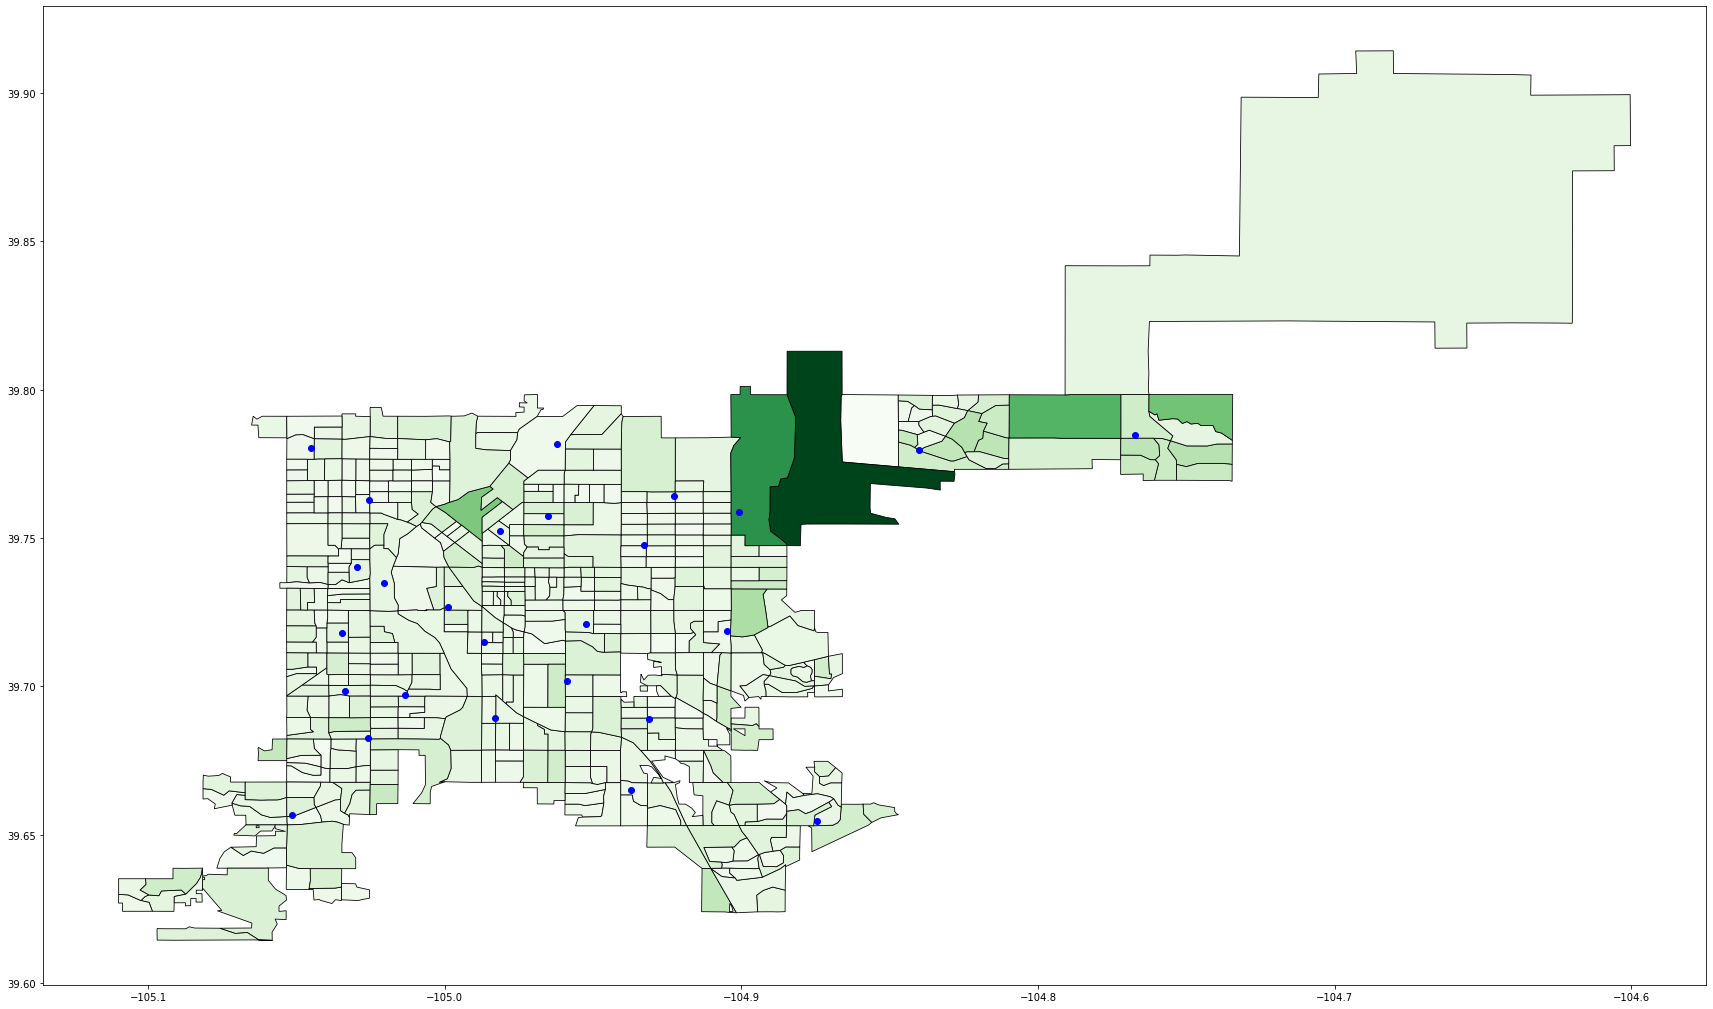

In [5]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'pop'
#variable = 'POPULATION'

# set the range for the choropleth
vmin, vmax = colorado['pop'].min(), colorado['pop'].max()
#vmin, vmax = colorado['POPULATION'].min(), colorado['POPULATION'].max()

# create figure and axes for Matplotlib
# fig, ax = plt.subplots(1, figsize=(20, 12))
ax = colorado.plot(column=variable, cmap='Greens', linewidth=0.8, edgecolor='black', figsize=(30, 18))

x, y = pol_locs['Longitude'].values, pol_locs['Latitude'].values
ax.scatter(x,y, marker="o", color='b')
# gdf.plot(marker='o')

plt.show()

###Gotta fix this to get colorboar to show up with plot
# # Create colorbar as a legend
# sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # empty array for the data range
# sm._A = []
# # add the colorbar to the figure
# cbar = colorado.colorbar(sm)



## Center of Each Census Block

In [6]:
from shapely.wkt import loads as load_wkt
centers = colorado['geometry'].centroid
print(centers.loc[:])

2       POINT (-104.75700 39.77557)
8       POINT (-105.03697 39.76673)
22      POINT (-104.95473 39.68793)
31      POINT (-105.04365 39.68518)
48      POINT (-105.04971 39.73770)
                   ...             
3505    POINT (-104.93634 39.74557)
3515    POINT (-105.04525 39.78827)
3517    POINT (-104.99087 39.77655)
3518    POINT (-104.98446 39.72141)
3529    POINT (-104.89404 39.77591)
Length: 481, dtype: geometry


## Create Matrix of Distances Between Census Blocks and Voting Locations

### Reindexing centroid data

In [23]:
centers = centers.reset_index(drop=True)

### Calculating distance between all points and storing in matrix

In [28]:
dist = np.zeros((len(gdf),len(centers)))

for i in range(1,len(gdf)):
    for j in range(1,len(centers)):
        dist[i,j] = (gdf.loc[i,'geometry'].distance(centers.loc[j]))*(gdf.loc[i,'geometry'].distance(centers.loc[j]))


In [29]:
print(dist)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00540489 0.00351308 ... 0.00681013 0.00142049 0.02042744]
 [0.         0.00238936 0.00727036 ... 0.00534748 0.00252199 0.02311058]
 ...
 [0.         0.01727152 0.00055936 ... 0.01126188 0.0039064  0.00895194]
 [0.         0.00466333 0.00634521 ... 0.00792185 0.00294698 0.0254912 ]
 [0.         0.00014954 0.01059715 ... 0.00138109 0.00338804 0.01742672]]
